#### "Prediksi Risiko Penyakit Jantung Menggunakan Algoritma Klasifikasi"

##### 1. Pengumpulan Data

In [2]:
import pandas as pd

# Mengunduh dan membaca dataset
data = pd.read_csv('Heart_Disease_Classification_Dataset.csv')  # Ganti dengan path file Anda

# Menampilkan beberapa baris pertama dari dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


- Kode ini mengimpor pustaka pandas dan membaca dataset dari file CSV. Kemudian, menampilkan lima baris pertama dari dataset untuk memahami strukturnya.

##### 2. Preprocessing Data

In [3]:
# Memeriksa nilai yang hilang
print(data.isnull().sum())

# Menghapus baris dengan nilai yang hilang (jika ada)
data.dropna(inplace=True)

# Normalisasi fitur (contoh: kolesterol dan tekanan darah)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['chol', 'trestbps']] = scaler.fit_transform(data[['chol', 'trestbps']])

# Menampilkan informasi dataset setelah preprocessing
print(data.info())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.2 KB
None


- Memeriksa apakah ada nilai yang hilang dalam dataset. Jika ada, baris tersebut dihapus. Kemudian, fitur kolesterol dan tekanan darah dinormalisasi ke rentang 0-1 menggunakan MinMaxScaler. Terakhir, informasi dataset ditampilkan untuk memastikan tidak ada nilai yang hilang.

##### 3. Pemilihan Algoritma Klasifikasi

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Memisahkan fitur dan target
X = data.drop('target', axis=1)  # Fitur
y = data['target']  # Target

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Memisahkan dataset menjadi fitur (X) dan target (y). Kemudian, data dibagi menjadi data pelatihan dan pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.

##### 4. Pelatihan Model

In [5]:
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(X_train, y_train)

KNeighborsClassifier()

- Membuat model KNN dengan 5 tetangga terdekat dan melatih model menggunakan data pelatihan.

##### 5. Evaluasi Model

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Menampilkan matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:')
print(conf_matrix)

Akurasi: 0.79
Presisi: 0.78
Recall: 0.81
F1-Score: 0.79
Matriks Kebingungan:
[[78 24]
 [20 83]]


- Melakukan prediksi pada data pengujian dan menghitung metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Hasil evaluasi ditampilkan, bersama dengan matriks kebingungan yang menunjukkan jumlah prediksi benar dan salah.

##### 6. Interpretasi dan Analisis Hasil

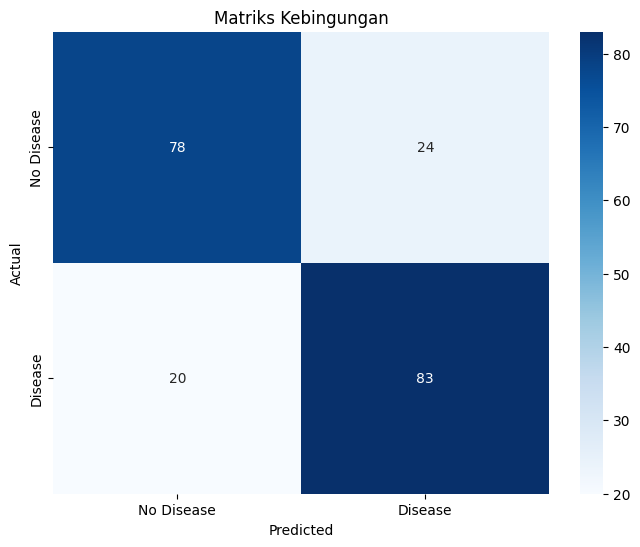

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriks Kebingungan')
plt.show()

- Menggunakan seaborn untuk membuat heatmap dari matriks kebingungan, yang membantu dalam visualisasi hasil prediksi model.